- オプティマイザーをAdamに変更
- filter数を減らす
- 層の数はそのまま3つ

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

labels= pd.read_csv("train_master.tsv", sep="\t")
master = pd.read_csv("label_master.tsv", sep="\t")
sample = pd.read_csv("sample_submit.csv", header=None, sep=",")

train_images = []
for fname in labels["file_name"]:
    path = "./train/" + fname
    img = io.imread(path)
    train_images.append(img)
train_images = np.array(train_images)
print(type(train_images), train_images.shape)

test_images = []
for fname in sample[0]:
    path = "./test/" + fname
    img = io.imread(path)
    test_images.append(img)
test_images = np.array(test_images )
print(type(test_images ), test_images.shape)

train_images = train_images / 255
test_images = test_images / 255

y = labels["label_id"]

y_categorical = utils.to_categorical(y)
y_categorical

X_con_image, X_ver_image = np.split(train_images, [40000])
y_con_label, y_ver_label = np.split(y_categorical, [40000])

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=240))
model.add(Activation("relu"))
model.add(Dense(units=120))
model.add(Activation("relu"))
model.add(Dense(units=20))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(),
              metrics=["accuracy"])

batch_size=100
epochs=30
              
history = model.fit(X_con_image, y_con_label,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_ver_image, y_ver_label))

Using TensorFlow backend.


<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 22s 552us/step - loss: 2.5139 - accuracy: 0.2183 - val_loss: 2.2219 - val_accuracy: 0.3210
Epoch 2/30
40000/40000 [==============================] - 23s 574us/step - loss: 2.1026 - accuracy: 0.3460 - val_loss: 2.0067 - val_accuracy: 0.3715
Epoch 3/30
40000/40000 [==============================] - 23s 570us/step - loss: 1.9113 - accuracy: 0.4047 - val_loss: 1.8787 - val_accuracy: 0.4216
Epoch 4/30
40000/40000 [==============================] - 21s 536us/step - loss: 1.7831 - accuracy: 0.4430 - val_loss: 1.8220 - val_accuracy: 0.4395
Epoch 5/30
40000/40000 [==============================] - 20s 505us/step - loss: 1.6712 - accuracy: 0.4766 - val_loss: 1.7427 - val_accuracy: 0.4574
Epoch 6/30
40000/40000 [==============================] - 20s 496us/step - loss: 1.5745 - accuracy: 0.5066 - val_loss: 

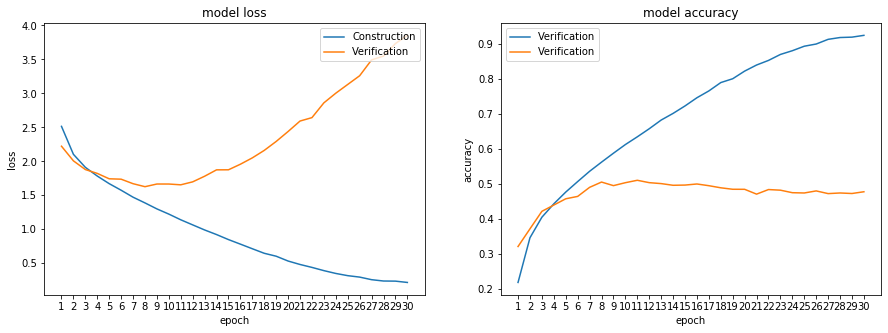

In [6]:
def learning_plot(history, epochs):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1), history.history['loss'])
    plt.plot(range(1,epochs+1), history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.xticks(range(1,epochs+1))
    plt.ylabel('loss')
    plt.legend(['Construction', 'Verification'], loc='upper right')
    plt.subplot(1,2,2)
    plt.plot(range(1,epochs+1), history.history['accuracy'])
    plt.plot(range(1,epochs+1), history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.xticks(range(1,epochs+1))
    plt.ylabel('accuracy')
    plt.legend(['Verification', 'Verification'], loc='upper left')
    plt.show()    
    
learning_plot(history,epochs)

In [5]:
pred = model.predict(test_images)
print(pred)
sample[1] = pred
sample.to_csv("submit4_1.csv", sep=",", index=None, header=None)

[[1.9504766e-01 2.0874561e-05 2.2307651e-11 ... 2.2051339e-03
  7.8409874e-05 1.1865790e-03]
 [7.4039381e-06 7.4725649e-05 2.8106948e-08 ... 6.4462853e-08
  9.5893382e-05 9.5543469e-11]
 [9.9275452e-01 9.1348684e-06 1.6979998e-10 ... 1.9777715e-09
  2.8808437e-08 1.9391379e-08]
 ...
 [2.0465117e-05 1.2064711e-03 5.6735161e-07 ... 1.1644665e-03
  4.7949824e-04 6.1532950e-07]
 [1.5796066e-05 1.5531154e-04 2.9575767e-04 ... 1.7079252e-06
  8.2759082e-01 1.0120836e-03]
 [1.0533214e-16 7.8663128e-05 1.1143396e-01 ... 1.8708573e-11
  1.4806272e-06 1.1609674e-05]]


In [4]:
print(model.evaluate(X_ver_image ,y_ver_label  ))

10000/10000 [==============================] - 2s 168us/step
[3.852484819030762, 0.47749999165534973]
